# Exploring pokemon dataset

I wanna know if there is correlation between weights and heights

I wanna know which are the differences in stats between types

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
data_path = 'pokemon.csv'
pokemon_data = pd.read_csv(data_path)
pokemon_data.head()

,id,ndex,species,forme,type1,type2,ability1,ability2,abilityH,hp,...,weight,height,dex1,dex2,class,percent-male,percent-female,pre-evolution,egg-group1,egg-group2
0,1,1,Bulbasaur,Bulbasaur,Grass,Poison,Overgrow,NaN,Chlorophyll,45,...,15.2 lbs.,"2'04""",NaN,NaN,Seed Pokémon,0.875,0.125,NaN,Monster,Grass
1,2,2,Ivysaur,Ivysaur,Grass,Poison,Overgrow,NaN,Chlorophyll,60,...,28.7 lbs.,"3'03""",NaN,NaN,Seed Pokémon,0.875,0.125,Bulbasaur,Monster,Grass
2,3,3,Venusaur,Venusaur,Grass,Poison,Overgrow,NaN,Chlorophyll,80,...,220.5 lbs.,"6'07""",NaN,NaN,Seed Pokémon,0.875,0.125,Ivysaur,Monster,Grass
3,4,4,Charmander,Charmander,Fire,NaN,Blaze,NaN,Solar Power,39,...,18.7 lbs.,"2'00""",NaN,NaN,Lizard Pokémon,0.875,0.125,NaN,Monster,Dragon
4,5,5,Charmeleon,Charmeleon,Fire,NaN,Blaze,NaN,Solar Power,58,...,41.9 lbs.,"3'07""",NaN,NaN,Flame Pokémon,0.875,0.125,Charmander,Monster,Dragon


In [3]:
#Converting weight and height in decimals
def pounds_in_kilograms (w):
    only_num=w[:len(w)-4]
    lbs= pd.to_numeric(only_num)
    return lbs*0.45

def feet_in_centimeters (h):
    feet_inches=re.split('\'|"',h)
    feet = float(feet_inches[0])
    inches = float(feet_inches[1])
    cm=feet*30.48+inches*2.54
    return cm

pokemon_data['weight(kg)'] = pokemon_data['weight'].apply(pounds_in_kilograms)
pokemon_data['height(cm)'] = pokemon_data['height'].apply(feet_in_centimeters)
columns_to_drop=['dex1','dex2','weight','height']
pokemon_data=pokemon_data.drop(columns_to_drop,axis=1)
pokemon_data.head()

,id,ndex,species,forme,type1,type2,ability1,ability2,abilityH,hp,...,speed,total,class,percent-male,percent-female,pre-evolution,egg-group1,egg-group2,weight(kg),height(cm)
0,1,1,Bulbasaur,Bulbasaur,Grass,Poison,Overgrow,NaN,Chlorophyll,45,...,45,318,Seed Pokémon,0.875,0.125,NaN,Monster,Grass,6.840,71.12
1,2,2,Ivysaur,Ivysaur,Grass,Poison,Overgrow,NaN,Chlorophyll,60,...,60,405,Seed Pokémon,0.875,0.125,Bulbasaur,Monster,Grass,12.915,99.06
2,3,3,Venusaur,Venusaur,Grass,Poison,Overgrow,NaN,Chlorophyll,80,...,80,525,Seed Pokémon,0.875,0.125,Ivysaur,Monster,Grass,99.225,200.66
3,4,4,Charmander,Charmander,Fire,NaN,Blaze,NaN,Solar Power,39,...,65,309,Lizard Pokémon,0.875,0.125,NaN,Monster,Dragon,8.415,60.96
4,5,5,Charmeleon,Charmeleon,Fire,NaN,Blaze,NaN,Solar Power,58,...,80,405,Flame Pokémon,0.875,0.125,Charmander,Monster,Dragon,18.855,109.22


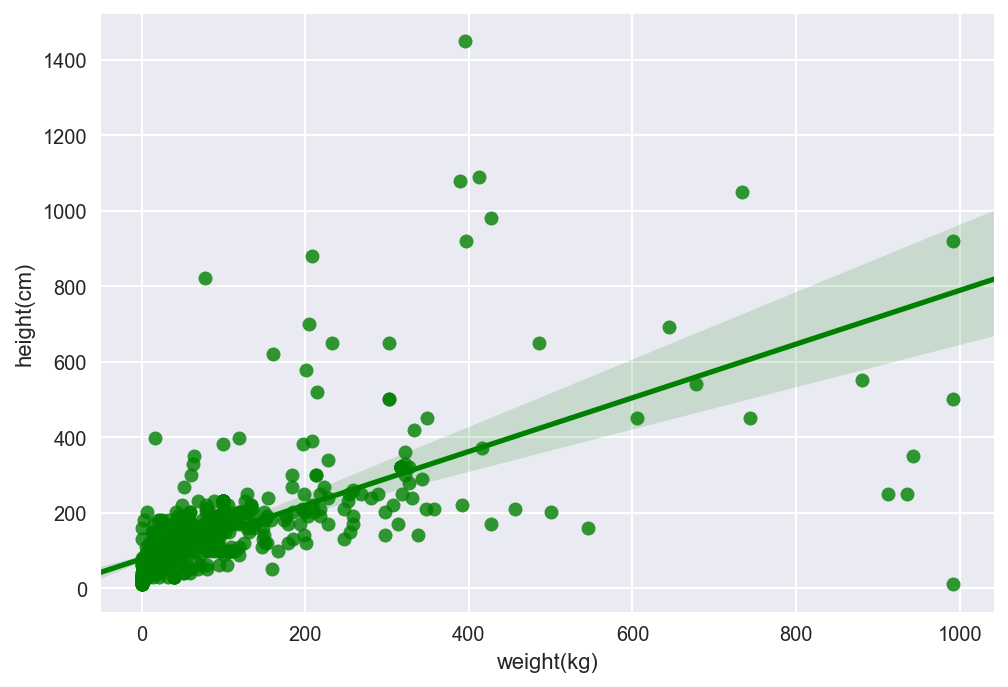

In [4]:
p = sns.regplot(x=pokemon_data['weight(kg)'], y=pokemon_data['height(cm)'], color="g")

### Comparing types


In [5]:
# Seeing amount between type1 and type2
pokemon_data['type1'] = pokemon_data['type1'].astype('category')
pokemon_data['type2'] = pokemon_data['type2'].astype('category')
count_pokemon_type1 = pd.Series(pokemon_data.groupby("type1").id.agg(lambda x:len(x.unique())),name='count_type1')
count_pokemon_type2 = pd.Series(pokemon_data.groupby("type2").id.agg(lambda x:len(x.unique())),name='count_type2')
count_pokemon_type=pd.concat([count_pokemon_type1,count_pokemon_type2], axis=1)
count_pokemon_type

,count_type1,count_type2
Bug,106,5
Dark,41,22
Dragon,42,20
Electric,57,12
Fairy,34,39
Fighting,31,34
Fire,61,15
Flying,6,140
Ghost,42,18
Grass,87,32


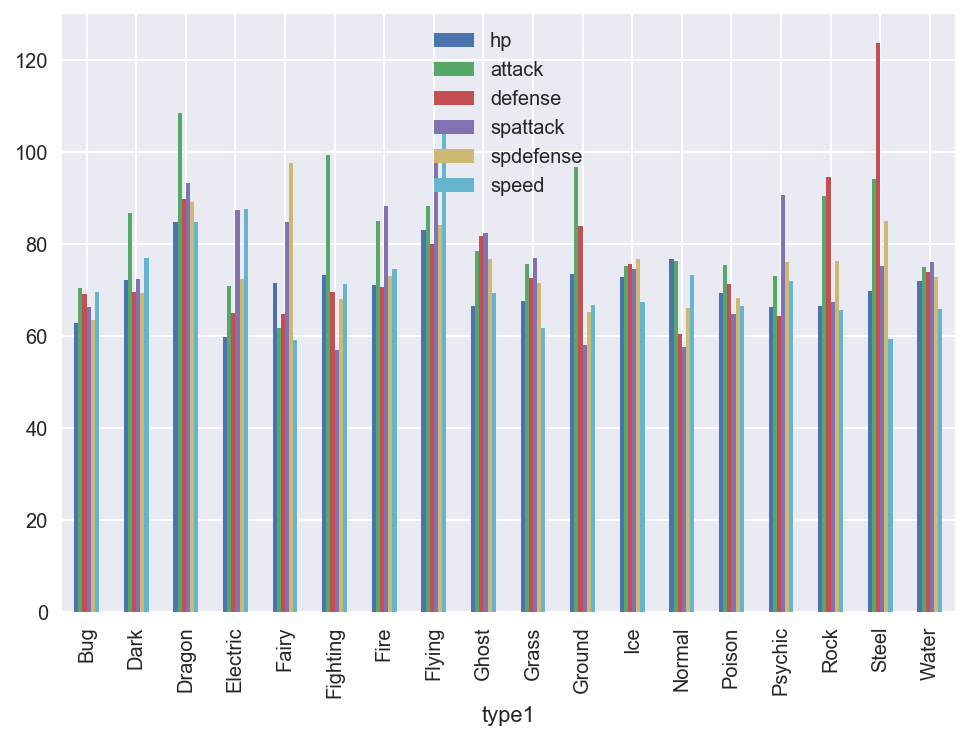

In [6]:
#Comparing stats between types
pokemon_stats_data = pokemon_data[['type1','hp','attack','defense','spattack','spdefense','speed']].copy()
grouped_by_type1=pokemon_stats_data.groupby(['type1'])
grouped_by_type1.mean().plot(kind='bar')

In [7]:
#Showing the 6 flying pokemon in type1
pokemon_data[pokemon_data['type1'].str.contains("Flying")]

,id,ndex,species,forme,type1,type2,ability1,ability2,abilityH,hp,...,speed,total,class,percent-male,percent-female,pre-evolution,egg-group1,egg-group2,weight(kg),height(cm)
640,641,641,Tornadus,Tornadus (Incarnate Forme),Flying,NaN,Prankster,NaN,Defiant,79,...,111,580,Cyclone Pokémon,1.0,0.0,NaN,Undiscovered,NaN,62.505,149.86
713,714,714,Noibat,Noibat,Flying,Dragon,Frisk,Infiltrator,Telepathy,40,...,55,245,Sound Wave Pokémon,0.5,0.5,NaN,Flying,NaN,7.920,50.80
714,715,715,Noivern,Noivern,Flying,Dragon,Frisk,Infiltrator,Telepathy,85,...,123,535,Sound Wave Pokémon,0.5,0.5,Noibat,Flying,NaN,84.330,149.86
923,925,493,Arceus,Arceus (Flying),Flying,NaN,Multitype,NaN,NaN,120,...,120,720,Alpha Pokémon,NaN,NaN,NaN,Undiscovered,NaN,317.475,320.04
948,950,641,Tornadus,Tornadus (Therian Forme),Flying,NaN,Regenerator,NaN,NaN,79,...,121,580,Cyclone Pokémon,1.0,0.0,NaN,Undiscovered,NaN,62.505,139.70
1027,1029,773,Silvally,Silvally (Type: Flying),Flying,NaN,RKS System,RKS System,RKS System,95,...,95,570,Synthetic Pokémon,NaN,NaN,Type: Null,Undiscovered,NaN,99.720,231.14


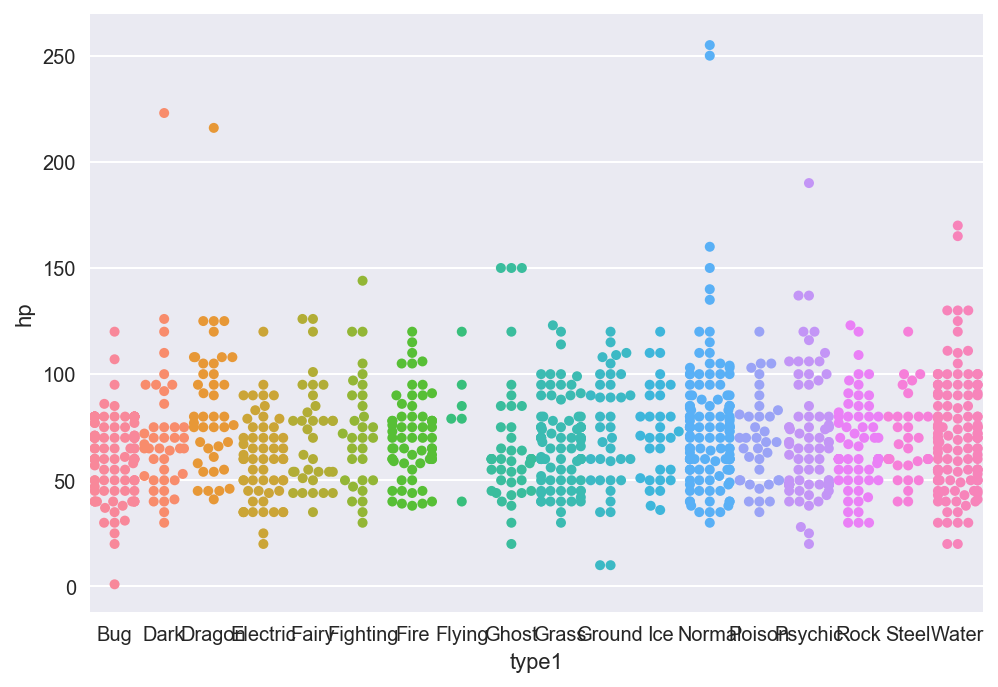

In [8]:
#Visualizing hp by type1
sns.swarmplot(x="type1", y="hp", data=pokemon_data);